In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

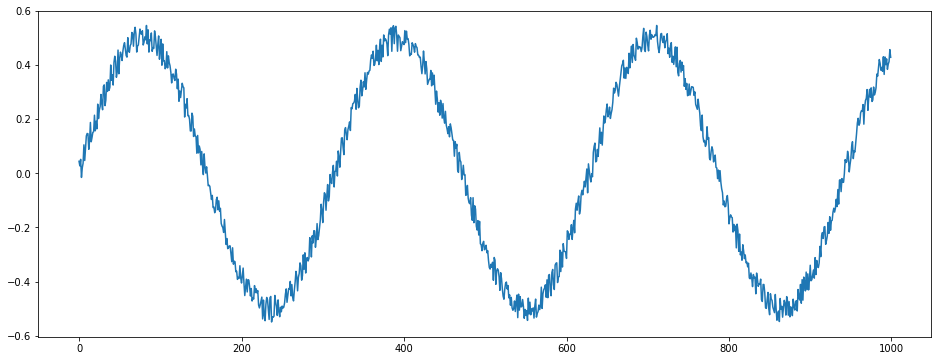

In [3]:
N = 1000 
t = np.arange(0, N)
data_sine = np.sin(0.02 * t)/2 + np.random.uniform(-0.05, 0.05, N) #عمدا نویز دادم که شبکه توی شرایط نویزی هم اوکی باشه
plt.figure(figsize=(16, 6))
plt.plot(data_sine)

In [4]:
def conver_to_dataset(signal, step):
  X = []
  Y = []
  for i in range(len(signal) - step):
    j = i + step
    X.append(signal[i:j])
    Y.append(signal[j])
  return np.array(X), np.array(Y)

In [5]:
X_sine, Y_sine = conver_to_dataset(data_sine, 40) # شبکه ۴۰ تا رو می بینه بعد اظهار نظر می کنه

In [6]:
Y_sine.shape

(960,)

In [7]:
X_train = np.array(X_sine[0:700])
Y_train = np.array(Y_sine[0:700])

X_test = np.array(X_sine[700:len(X_sine)])
y_test = np.array(Y_sine[700:len(Y_sine)])

In [8]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
model = tf.keras.models.Sequential([
                                    layers.SimpleRNN(units=64, input_shape=(None, 1)),
                                    layers.Dense(1)
])

In [10]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MSE
)

In [11]:
model.fit(X_train, Y_train, epochs=20, batch_size=16)

Epoch 1/20
44/44 [==============================] - 5s 39ms/step - loss: 0.0098
Epoch 2/20
44/44 [==============================] - 2s 40ms/step - loss: 0.0018
Epoch 3/20
44/44 [==============================] - 2s 40ms/step - loss: 0.0015
Epoch 4/20
44/44 [==============================] - 2s 39ms/step - loss: 0.0014
Epoch 5/20
44/44 [==============================] - 2s 39ms/step - loss: 0.0012
Epoch 6/20
44/44 [==============================] - 2s 40ms/step - loss: 0.0012
Epoch 7/20
44/44 [==============================] - 2s 38ms/step - loss: 0.0013
Epoch 8/20
44/44 [==============================] - 2s 40ms/step - loss: 0.0012
Epoch 9/20
44/44 [==============================] - 2s 40ms/step - loss: 0.0012
Epoch 10/20
44/44 [==============================] - 2s 39ms/step - loss: 0.0011
Epoch 11/20
44/44 [==============================] - 2s 45ms/step - loss: 0.0012
Epoch 12/20
44/44 [==============================] - 2s 51ms/step - loss: 0.0012
Epoch 13/20
44/44 [==================

In [12]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 0.0012


0.0012231647269800305

In [13]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [33]:
train_pred.shape, test_pred.shape

((700, 1), (260, 1))

In [34]:
# shift test data to the front
len_test_pred = len(train_pred) + len(test_pred)
temp_test_pred = np.empty((len_test_pred,1))
temp_test_pred[len(train_pred):len_test_pred] = test_pred

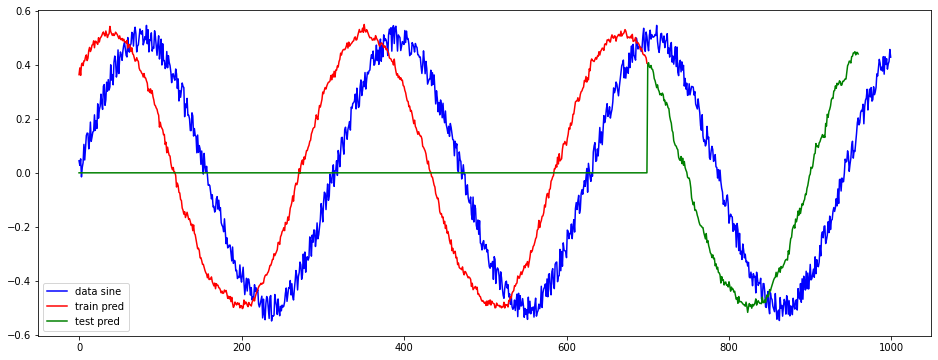

In [35]:
plt.figure(figsize=(16, 6))
plt.plot(data_sine, color='b', label='data sine')
plt.plot(train_pred, color='r', label='train pred')
plt.plot(temp_test_pred, color='g', label='test pred')
plt.legend()